<a href="https://colab.research.google.com/github/silviaherf/foodie_app/blob/main/src/V1_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

# Confirm that we're using Python 3
assert sys.version_info.major is 3, 'Oops, not running Python 3. Use Runtime > Change runtime type'

In [2]:
import cv2
import glob
import os
import random
import seaborn as sns
from shutil import copy
from google.colab import files
from shutil import copytree, rmtree
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Input
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from keras.losses import categorical_crossentropy
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adadelta,SGD
from tensorflow.keras.backend import mean
from tensorflow.keras.losses import mse
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler 
from tensorflow.keras.applications.inception_v3 import preprocess_input, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
file_name = '/content/drive/My Drive/foodie API/food.zip'

In [19]:
names=['lobster_roll_sandwich',
 'beet_salad',
 'red_velvet_cake',
 'falafel',
 'paella',
 'french_onion_soup',
 'caesar_salad',
 'chicken_quesadilla',
 'beef_carpaccio',
 'macaroni_and_cheese',
 'lobster_bisque',
 'ice_cream',
 'omelette',
 'frozen_yogurt',
 'panna_cotta',
 'beignets',
 'ravioli',
 'tacos',
 'edamame',
 'risotto',
 'creme_brulee',
 'chocolate_mousse',
 'onion_rings',
 'hot_and_sour_soup',
 'pizza',
 'hamburger',
 'cannoli',
 'pancakes',
 'shrimp_and_grits',
 'sashimi',
 'lasagna',
 'hummus',
 'oysters',
 'baby_back_ribs',
 'chocolate_cake',
 'guacamole',
 'fish_and_chips',
 'croque_madame',
 'bread_pudding',
 'eggs_benedict',
 'takoyaki',
 'ceviche',
 'spaghetti_carbonara',
 'scallops',
 'spaghetti_bolognese',
 'tuna_tartare',
 'sushi',
 'french_fries',
 'pulled_pork_sandwich',
 'bruschetta',
 'gyoza',
 'spring_rolls',
 'huevos_rancheros',
 'beef_tartare',
 'pho',
 'hot_dog',
 'crab_cakes',
 'cup_cakes',
 'fried_rice',
 'churros',
 'escargots',
 'ramen',
 'foie_gras',
 'chicken_curry',
 'garlic_bread',
 'strawberry_shortcake',
 'tiramisu',
 'clam_chowder',
 'fried_calamari',
 'french_toast',
 'chicken_wings',
 'poutine',
 'dumplings',
 'samosa',
 'steak',
 'gnocchi',
 'macarons',
 'cheesecake',
 'waffles',
 'cheese_plate',
 'nachos',
 'greek_salad',
 'peking_duck',
 'carrot_cake',
 'mussels',
 'breakfast_burrito',
 'filet_mignon',
 'pad_thai',
 'club_sandwich',
 'deviled_eggs',
 'baklava',
 'caprese_salad',
 'seaweed_salad',
 'grilled_salmon',
 'bibimbap',
 'apple_pie',
 'donuts',
 'prime_rib',
 'grilled_cheese_sandwich',
 'miso_soup',
 'pork_chop']

In [26]:
from zipfile import ZipFile 

archive = ZipFile(file_name)

for file in archive.namelist():
  
  if file.split('/')[1] in names[0:20]:
      archive.extract(file)

In [27]:
train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        horizontal_flip=True)

In [28]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [29]:
train_generator = train_datagen.flow_from_directory(
    '/content/train',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 15000 images belonging to 20 classes.


In [30]:
test_generator = test_datagen.flow_from_directory(
    '/content/test',
    target_size=(75,75),
    batch_size=80,
    class_mode='categorical',
    color_mode='rgb')

Found 5000 images belonging to 20 classes.


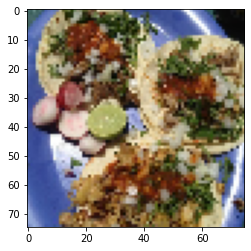

In [31]:
plt.imshow(train_generator[0][0][0])

We define our net topology

In [32]:
batch_size=80
epocas=50
n_classes=len(train_generator.class_indices)
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
#optimizer = tf.train.AdamOptimizer(0.001)
opt = SGD(lr=1e-2, momentum=0.9, decay=1e-2 / epocas)
loss="categorical_crossentropy"
optimizers=[Adam(),Adadelta(),SGD(learning_rate=1)]

In [33]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_normal', 
                 input_shape=(75,75,3)))

model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(n_classes, activation='softmax'))

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       7

### We define early Stopping, so that fitting stops if loss is not decreasing
### Also a model checkpoint, to both save the best model and its weights

In [37]:
earlystopping = EarlyStopping(
    monitor = 'loss', 
    verbose = 1, 
    patience = 20
)
checkpointer = ModelCheckpoint(filepath='../content/models/part_V1_check.hdf5', verbose=1, save_best_only=False)

In [38]:
history = model.fit(train_generator,
                    validation_data=test_generator,
                    epochs=epocas,
                    verbose=1,
                    callbacks=[earlystopping,checkpointer])

model.save('../content/models/part_V1_model.hdf5')

Epoch 1/50
188/188 [==============================] - ETA: 0s - loss: 1.9863 - accuracy: 0.3811
Epoch 00001: saving model to ../content/models/part_V1_check.hdf5
188/188 [==============================] - 250s 1s/step - loss: 1.9863 - accuracy: 0.3811 - val_loss: 1.9700 - val_accuracy: 0.3880
Epoch 2/50
188/188 [==============================] - ETA: 0s - loss: 1.9427 - accuracy: 0.4003
Epoch 00002: saving model to ../content/models/part_V1_check.hdf5
188/188 [==============================] - 249s 1s/step - loss: 1.9427 - accuracy: 0.4003 - val_loss: 1.8745 - val_accuracy: 0.4340
Epoch 3/50
188/188 [==============================] - ETA: 0s - loss: 1.8928 - accuracy: 0.4133
Epoch 00003: saving model to ../content/models/part_V1_check.hdf5
188/188 [==============================] - 249s 1s/step - loss: 1.8928 - accuracy: 0.4133 - val_loss: 1.9505 - val_accuracy: 0.3982
Epoch 4/50
188/188 [==============================] - ETA: 0s - loss: 1.8540 - accuracy: 0.4185
Epoch 00004: saving mo

OSError: ignored

In [ ]:
import os
os.mkdir('../content/models/')

In [41]:
model.save('../content/models/part_V1_model.hdf5')

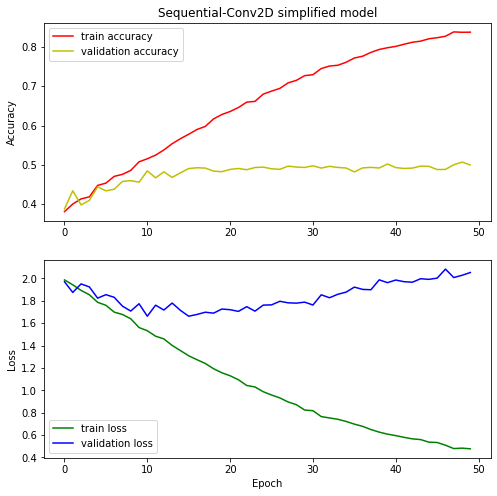

In [42]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.title('Sequential-Conv2D simplified model')
plt.plot(history.history['accuracy'],'r')
plt.ylabel('Accuracy')
plt.plot(history.history['val_accuracy'],'y')
plt.legend(['train accuracy','validation accuracy'], loc='best')



plt.subplot(2,1,2)
plt.plot(history.history['loss'],'g')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(history.history['val_loss'],'b')
plt.legend(['train loss','validation loss'], loc='best')


plt.savefig('../content/models/graphV1_20.png')

In [43]:
from google.colab import files

In [44]:
files.download('../content/models/graphV1_20.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('../content/models/part_V1_check.hdf5')

In [46]:
files.download('../content/models/part_V1_model.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
y_pred=model.predict(test_generator)

In [49]:
y_pred = np.argmax(y_pred, axis=1)

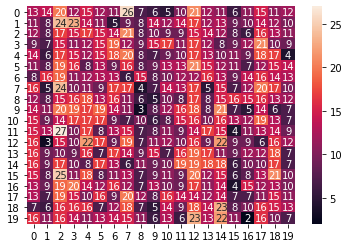

In [50]:
#Confution Matrix 
cm=confusion_matrix(test_generator.classes, y_pred)
sns.heatmap(cm,annot=True)